# Use PyEIS to simulate R(RC)
## 1-R(RC) has the same parameter setting as those in Matlab simulation. 
### 1.1 parameter setting. R0(R1C0) : R0=10 ohm; R1= 20 ohm; C0=1e-6 F.
### 1.2 Frequency rage.  1e-6 ~ 1e7
## 2-Compare the simulation results between PyEIS and Matlab

In [2]:
import PyEIS as pe

#### 按照相同的对数间隔产生频率，以及角速率（角频率）

In [5]:
f_range = pe.freq_gen(f_start=10 ** 7, f_stop=10 ** (-6), pts_decade = 10)
print(f_range[0][:4]) # First 4 points in the freq. array
print()
print(f_range[1][:4]) # First 4 points in the angular freq. array

[10000000.          7929116.63422681  6287089.05991723  4985106.24458553]

[62831853.07179587 49820109.13508716 39502945.60620148 31322346.31070898]


In [6]:
print(10 ** (-6))
print(1e-6)

1e-06
1e-06


#### Define a function: the structure of Circuit '-R0-R1C0-', I imitates the PyEIS code, and my code starts with 'ove_'

In [7]:
def ove_cir_R0_R1C0(w, R0, R1, C0):
    Z = R0 + R1 / (1 + 1j * w * C0 * R1)
    return Z

In [32]:
z = ove_cir_R0_R1C0(w = f_range[1], R0 = 10, R1 = 20, C0 = 1e-6)
print('Z shape', z.shape)
print('Element data type', type(z[0]))
print('First 5 Impedance', z[:5])
print('Last 5 Impedance', z[-5:])

Z shape (130,)
Element data type <class 'numpy.complex128'>
First 5 Impedance [10.00001267-0.01591548j 10.00002014-0.0200722j  10.00003204-0.02531453j
 10.00005096-0.03192601j 10.00008106-0.04026421j]
Last 5 Impedance [30.-6.35829443e-09j 30.-5.04156582e-09j 30.-3.99751634e-09j
 30.-3.16967733e-09j 30.-2.51327412e-09j]


In [12]:
import matplotlib.pyplot as plt

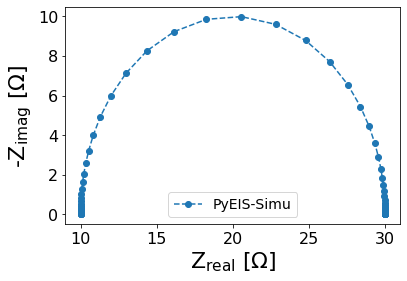

In [16]:
fig = plt.figure()
plt.plot(z.real, - z.imag, 'o--',label='PyEIS-Simu')

plt.xlabel('Z$_{real}$ [$\Omega$]')
plt.ylabel('-Z$_{imag}$ [$\Omega$]')
plt.legend()
plt.show()

In [18]:
from scipy.io import loadmat # 用于加载mat文件

mat_data_dict = loadmat('R_RC_test_discrete_ZData.mat') # mat-->dict字典
print(mat_data_dict.keys()) #其中有很多key，注意找自己数据所在的那个

dict_keys(['__header__', '__version__', '__globals__', 'R_RC_test_discrete_ZData'])


In [22]:
mat_data_arr = mat_data_dict['R_RC_test_discrete_ZData']
print(type(mat_data_arr), mat_data_arr.shape)
print(mat_data_arr[:5][:]) # The first column is frequency, the second column is Impedance

<class 'numpy.ndarray'> (131, 2)
[[1.00000000e-06+0.00000000e+00j 3.00000000e+01-2.51327412e-09j]
 [1.25892541e-06+0.00000000e+00j 3.00000000e+01-3.16402466e-09j]
 [1.58489319e-06+0.00000000e+00j 3.00000000e+01-3.98327105e-09j]
 [1.99526231e-06+0.00000000e+00j 3.00000000e+01-5.01464114e-09j]
 [2.51188643e-06+0.00000000e+00j 3.00000000e+01-6.31305917e-09j]]


In [28]:
d_real = mat_data_arr[:][1].real
print(d_real)

[1.25892541e-06 3.00000000e+01]


In [26]:
mat_frequency_list = [d[0].real for d in mat_data_arr]
print(type(mat_frequency_list[0]), mat_frequency_list[:5])

<class 'numpy.float64'> [1e-06, 1.2589254117941661e-06, 1.584893192461114e-06, 1.9952623149688787e-06, 2.5118864315095823e-06]


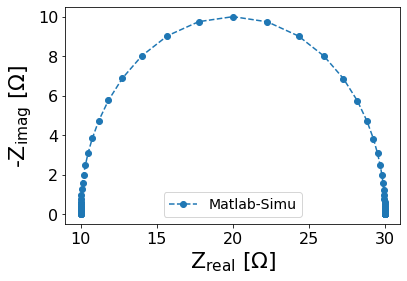

In [29]:
mat_z_real_list = [d[1].real for d in mat_data_arr]
mat_z_inverse_img_list = [-d[1].imag for d in mat_data_arr]

fig = plt.figure()
plt.plot(mat_z_real_list, mat_z_inverse_img_list, 'o--', label = 'Matlab-Simu')

plt.xlabel('Z$_{real}$ [$\Omega$]')
plt.ylabel('-Z$_{imag}$ [$\Omega$]')
plt.legend()
plt.show()

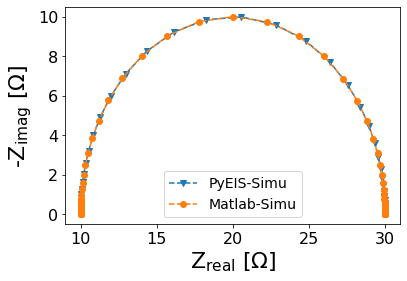

In [31]:
fig = plt.figure()

# Plot results from PyEIS
plt.plot(z.real, - z.imag, 'v--', label = 'PyEIS-Simu')

# Plot results from Matlab
plt.plot(mat_z_real_list, mat_z_inverse_img_list, 'o--', label = 'Matlab-Simu')

plt.xlabel('Z$_{real}$ [$\Omega$]')
plt.ylabel('-Z$_{imag}$ [$\Omega$]')

plt.legend()
plt.show()

### PyEIS 和 Matlab的频率生成方式均为：等间距对数采样，从1e-6 ~ 1e7，每个区间10个采样点，但是PyEIS的采样区间[前闭后开, 130)，Matlab的采样区间[前闭后闭，131] == logspace(-6, 7, 131)

### Matlab使用 logspace(-6, 7, 130)，产生的频率和Python结果一致

In [33]:
import math
math.log(100, 10)

2.0

In [34]:
r = [math.log(n, 10) for n in [ 100.        ,  215.443469  ,  464.15888336, 1000.        ]]
r

[2.0, 2.3333333333269057, 2.666666666665471, 2.9999999999999996]

In [36]:
f_range = pe.freq_gen(f_start=10**7, f_stop = 1e-6, pts_decade=10)
print(f_range[0][:20]) #First 5 points in the freq. array
print()
print(f_range[1][:4]) #First 5 points in the angular freq. array

[10000000.          7929116.63422681  6287089.05991723  4985106.24458553
  3952748.88473311  3134180.69328588  2485128.42698056  1970487.31485614
  1562422.37457588  1238862.92399378   982308.86181659   778884.15361784
   617586.32985869   489691.40411536   388282.0258009    307873.34695492
   244116.36765753   193562.71514804   153478.13444464   121694.60288151]

[62831853.07179587 49820109.13508716 39502945.60620148 31322346.31070898]


In [39]:
r = [math.log(n, 10) for n in f_range[0]]
print(r[:20])
print(r[-20:])

[7.0, 6.899224806201549, 6.7984496124030995, 6.697674418604651, 6.596899224806201, 6.496124031007752, 6.395348837209301, 6.2945736434108515, 6.1937984496124034, 6.093023255813953, 5.992248062015503, 5.891472868217054, 5.790697674418603, 5.689922480620155, 5.589147286821705, 5.488372093023255, 5.387596899224806, 5.286821705426356, 5.186046511627907, 5.0852713178294575]
[-4.0852713178294575, -4.186046511627906, -4.286821705426357, -4.387596899224806, -4.488372093023255, -4.589147286821705, -4.689922480620154, -4.790697674418604, -4.891472868217053, -4.992248062015503, -5.093023255813954, -5.193798449612403, -5.294573643410852, -5.395348837209303, -5.49612403100775, -5.596899224806201, -5.69767441860465, -5.7984496124030995, -5.89922480620155, -5.999999999999999]


In [40]:
a = 2 + 3j
b = 3j * 3j
b

(-9+0j)

In [41]:
c = a.real ** 2 + a.imag ** 2
c

13.0